In [ ]:

pip install highlight_text

In [ ]:
import pandas as pd
import numpy as np
import urllib
from PIL import Image
import matplotlib.font_manager
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from highlight_text import fig_text
import matplotlib.patheffects as path_effects

In [ ]:
data

,Rank,Name,GoalsGL,AssistsA,PlayedP,Goals per 90,Mins per GoalMPG,Total Shots,Goal Conversion,Shot Accuracy
0,1,Erling HaalandHaalandManchester CityMan City,36,8,35,1.17,77,107,34%,56%
1,2,Harry KaneKaneTottenham HotspurTottenham,30,3,38,0.79,114,100,30%,63%
2,3,Ivan ToneyToneyBrentfordBrentford,20,4,33,0.61,148,78,26%,54%
3,4,Mohamed SalahSalahLiverpoolLiverpool,19,12,38,0.52,173,97,20%,48%
4,5,Callum WilsonWilsonNewcastle UnitedNewcastle,18,5,31,0.86,105,63,29%,56%
5,6,Marcus RashfordRashfordManchester UnitedMan Utd,17,5,35,0.53,170,81,21%,62%
6,7,Martin ÃdegaardÃdegaardArsenalArsenal,15,7,37,0.43,210,60,25%,55%
7,7,Ollie WatkinsWatkinsAston VillaAston Villa,15,6,37,0.43,209,70,21%,67%
8,7,Gabriel MartinelliMartinelliArsenalArsenal,15,5,36,0.48,187,55,27%,58%
9,10,Bukayo SakaSakaArsenalArsenal,14,11,38,0.39,228,60,23%,53%


In [ ]:
data=pd.read_html("https://www.bbc.com/sport/football/premier-league/top-scorers")[0]

In [ ]:
def clean_name(name):
  no_capital_letters=3
  for i,letter in enumerate(name):
    if letter.isupper():
      no_capital_letters-=1
    if no_capital_letters==0:
      return name[:i]

In [ ]:
data["Name"]=data["Name"].apply(clean_name)

In [ ]:
#required data are Name,Goals per 90
required_data=data[["Name","Goals per 90"]][:15].sort_values(by="Goals per 90",ascending=True)

(-0.5, 191.5, 191.5, -0.5)

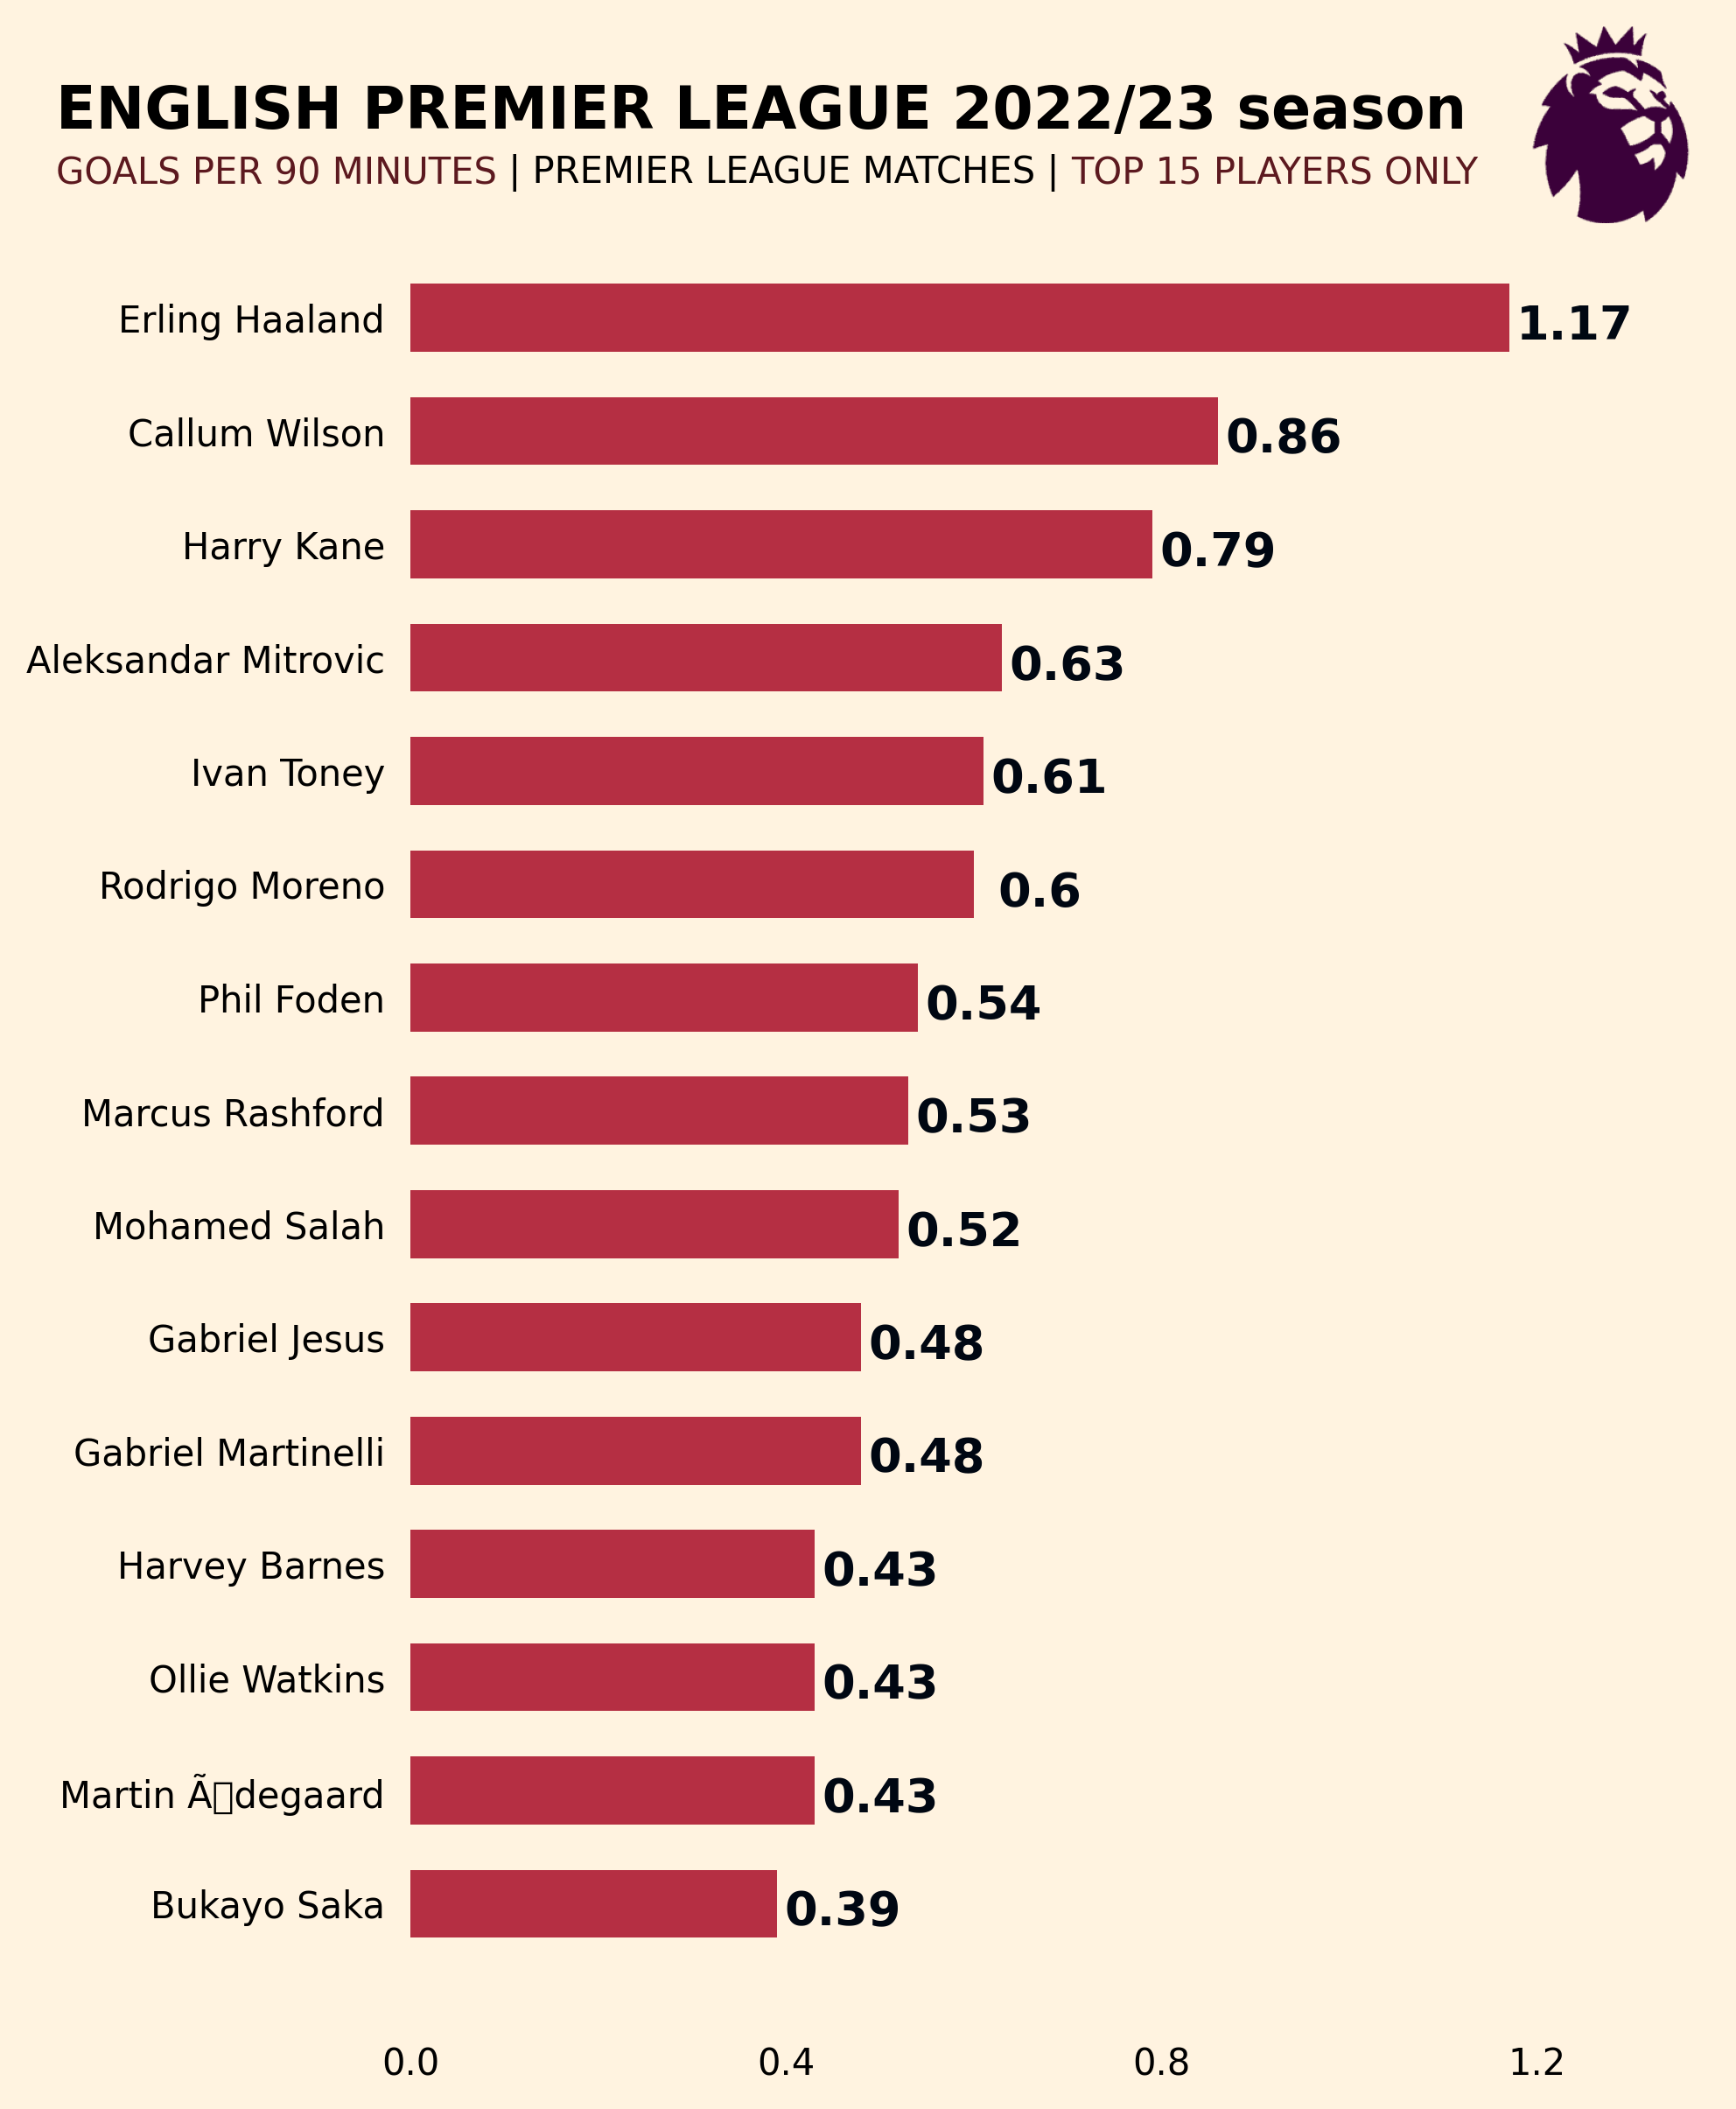

In [ ]:
fig = plt.figure(facecolor = "#fff3e0",figsize=(6,9), dpi=300)#figsize=(6, 2.5), dpi = 200
ax = plt.subplot(111,facecolor = "#fff3e0")



# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")

# We specify the height of the bar
height= 0.6

# Fouls conceded
ax.barh(
    required_data["Name"],
    required_data["Goals per 90"],
    height=height,
    color="#b52f43"
    )


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.4))


# Remove spines
ax.spines["top"].set(visible = False)
ax.spines["bottom"].set(visible = False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

#Annotate
for index,gp90 in enumerate(required_data["Goals per 90"]):
    ax.annotate(
        xy = (gp90 +0.07 , index-0.3),
        text = f"{gp90}",
        xytext = (0, 7),
        size = 13,
        textcoords = "offset points",
        color = "#000712",
        ha = "center",
        va = "center",
        weight = "bold"
    )

ax.set_xlim(0,1.3)
#Title
fig_text(
        x=-0.1,y=0.93,
        s="ENGLISH PREMIER LEAGUE 2022/23 season",
        size=16,
        color="black",
        weight="bold",
        annotationbbox_kw={"xycoords": "figure fraction"})


fig_text(
    x = -0.1, y = 0.9,
    s = "<GOALS PER 90 MINUTES> | PREMIER LEAGUE MATCHES | <TOP 15 PLAYERS ONLY>",
    color = "black",
    size = 10,
    highlight_textprops = [
        {"color": "#5c191f"},
        {"color":"#5c191f"}
    ],
    annotationbbox_kw={"xycoords": "figure fraction"}
)


epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
logo_ax = fig.add_axes([0.825, 0.85, 0.125, 0.125])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

(-0.5, 191.5, 191.5, -0.5)

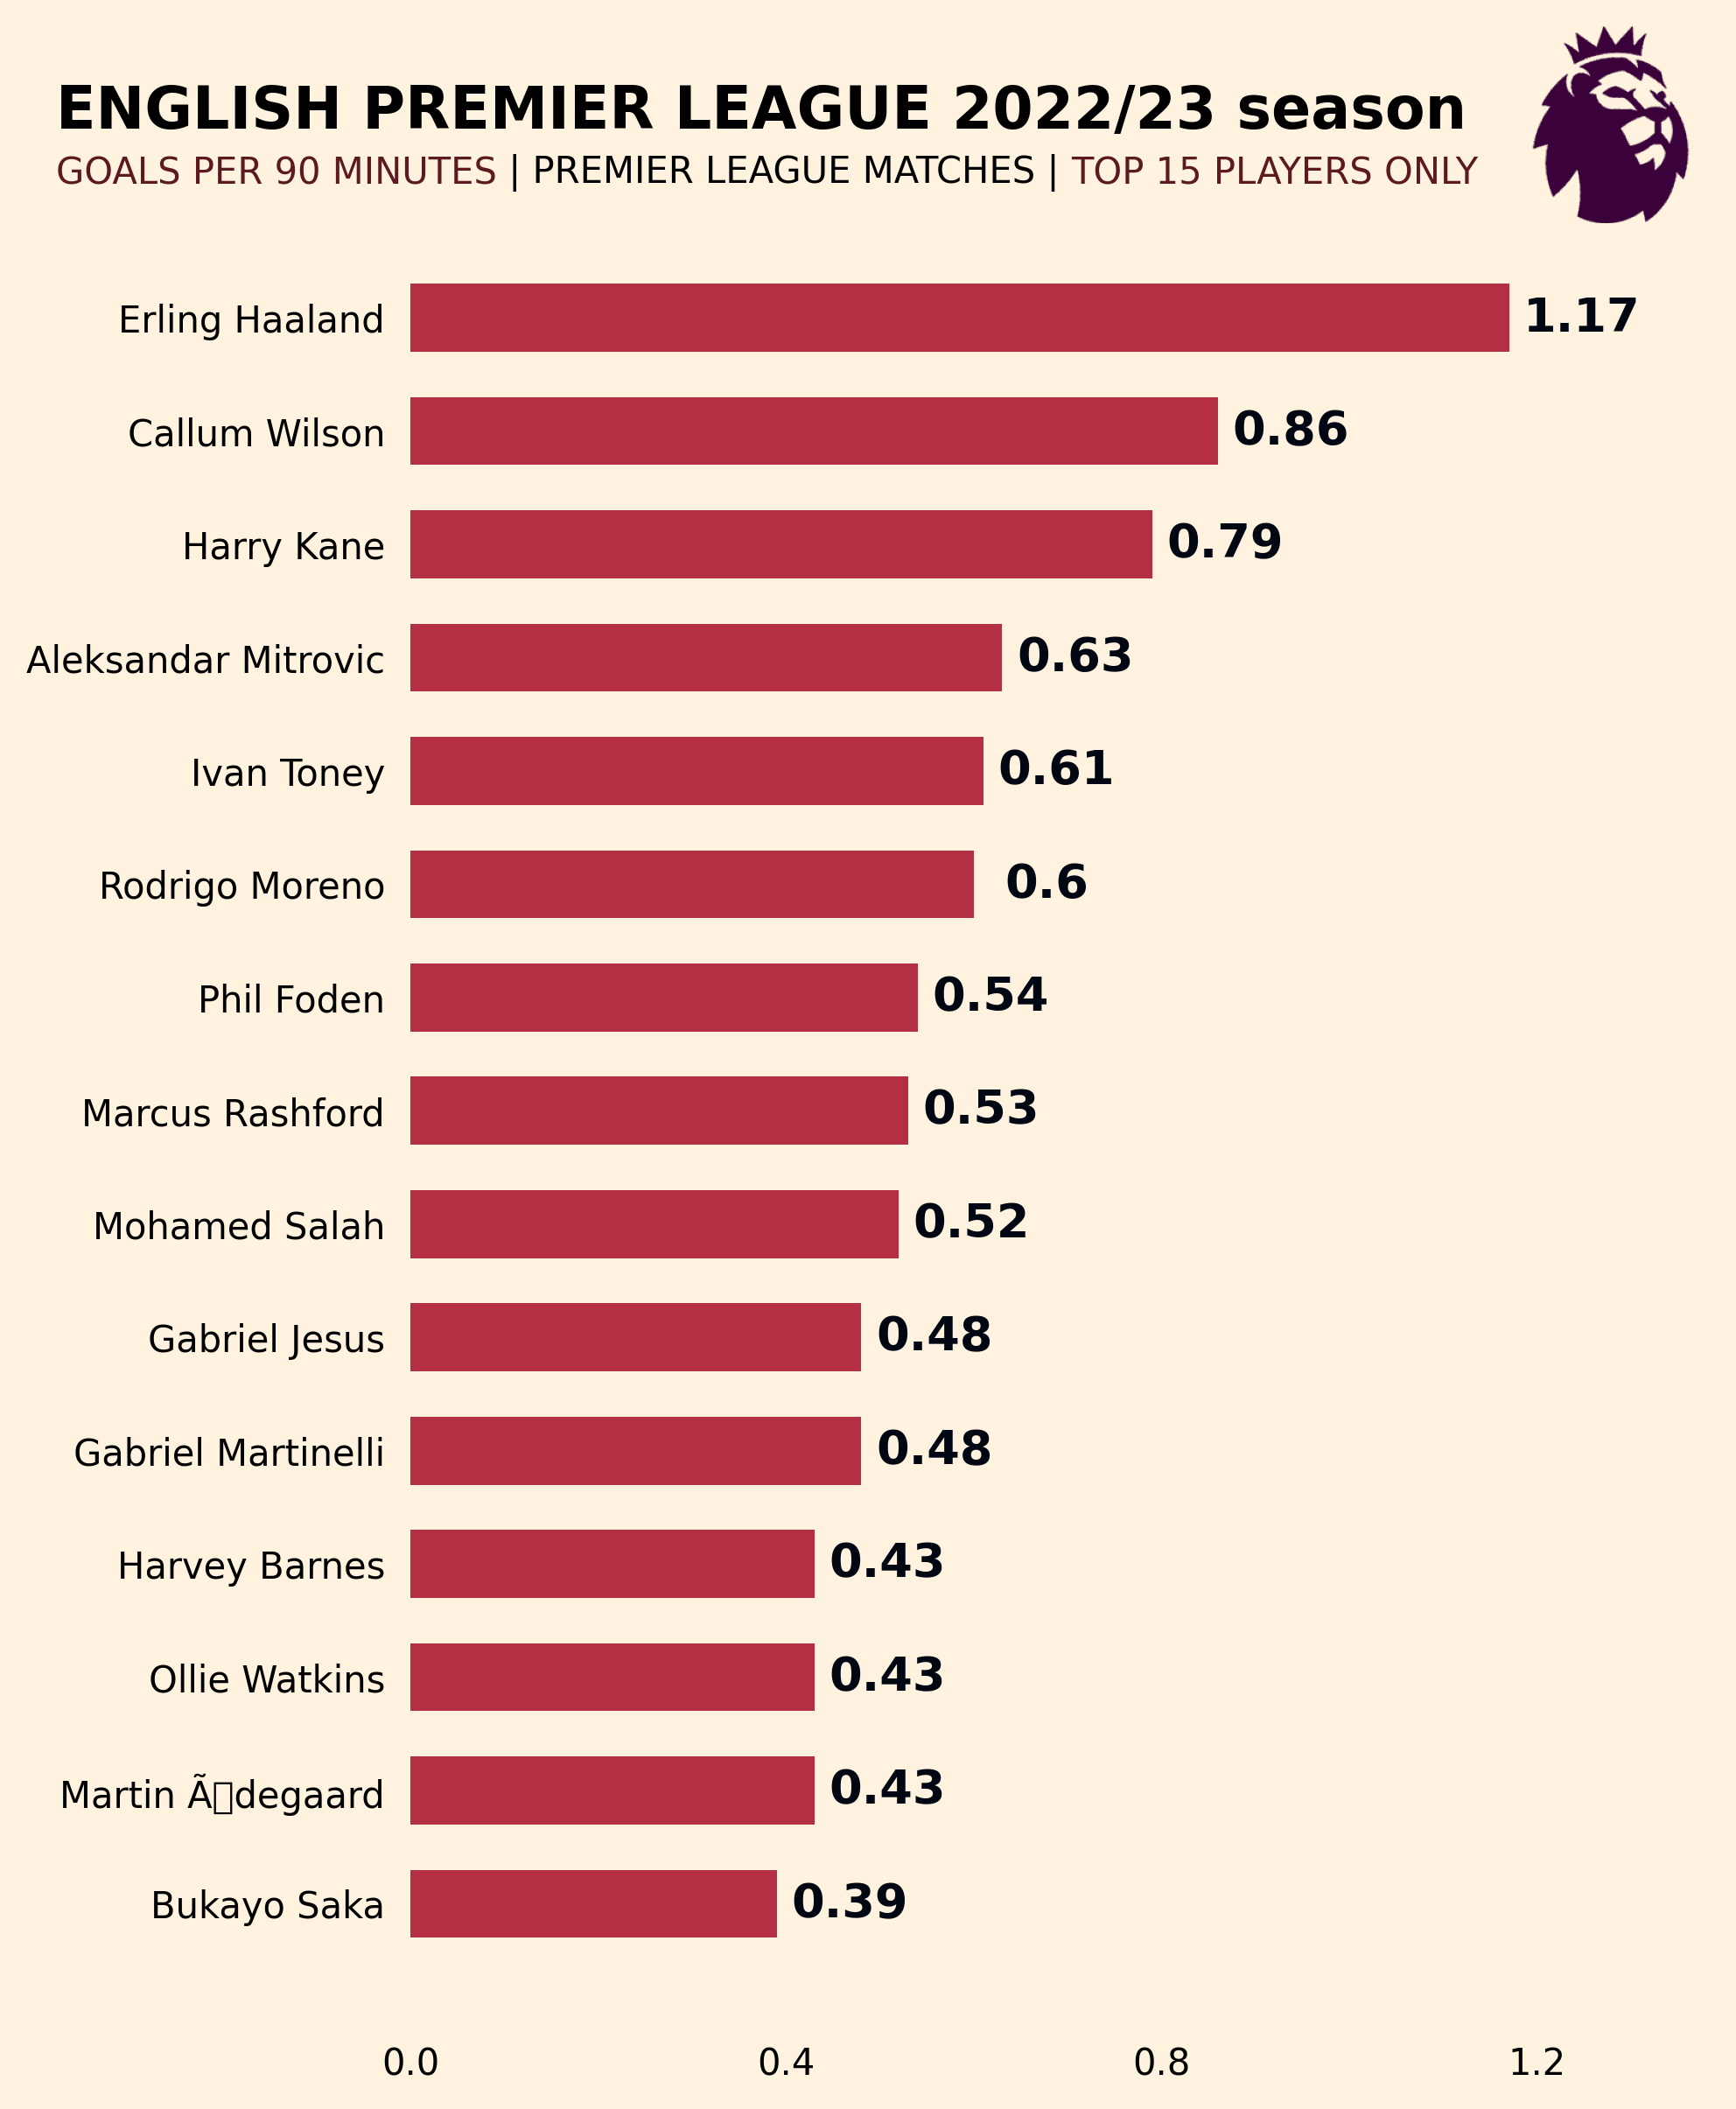

In [ ]:
fig = plt.figure(facecolor = "#fff3e0",figsize=(6,9), dpi=300)#figsize=(6, 2.5), dpi = 200
ax = plt.subplot(1,1,1,facecolor = "#fff3e0")

# We specify the height of the bar
height= 0.6

# Make a barplot on the Axes
ax.barh(
    required_data["Name"],
    required_data["Goals per 90"],
    height=height,
    color="#b52f43"
    )


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.4))


# Remove spines
ax.spines["top"].set(visible = False)
ax.spines["bottom"].set(visible = False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

#Annotate
for index,gp90 in enumerate(required_data["Goals per 90"]):
      ax.annotate(
        xy = (gp90 , index),
        text = f"{gp90}",
        xytext = (20, 0),
        size = 13,
        textcoords = "offset points",
        color = "#000712",
        ha = "center",
        va = "center",
        weight = "bold"
    )

ax.set_xlim(0,1.3)
#Title
fig_text(
        x=-0.1,y=0.93,
        s="ENGLISH PREMIER LEAGUE 2022/23 season",
        size=16,
        color="black",
        weight="bold",
        annotationbbox_kw={"xycoords": "figure fraction"})


fig_text(
    x = -0.1, y = 0.9,
    s = "<GOALS PER 90 MINUTES> | PREMIER LEAGUE MATCHES | <TOP 15 PLAYERS ONLY>",
    color = "black",
    size = 10,
    highlight_textprops = [
        {"color": "#5c191f"},
        {"color":"#5c191f"}
    ],
    annotationbbox_kw={"xycoords": "figure fraction"}
)


epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
logo_ax = fig.add_axes([0.825, 0.85, 0.125, 0.125])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
logo_ax.imshow(club_icon)
logo_ax.axis("off")